In [1]:
import numpy as np
import matplotlib.pyplot as plt

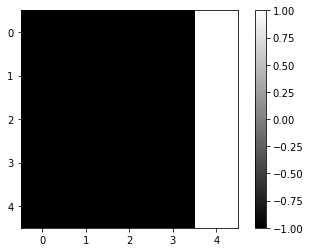

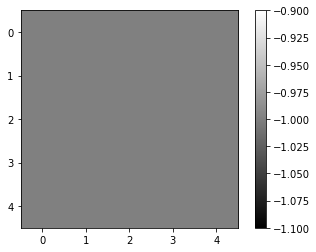

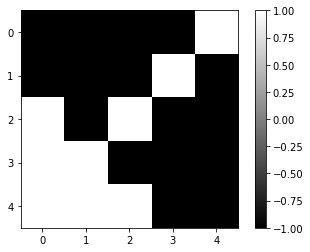

In [2]:
Width  = 5
Height = 5

NumberMemory = 3

Data = np.zeros((Width, Height, NumberMemory))

Data[:,:,0] = [[0,0,0,0,1],
               [0,0,0,0,1],
               [0,0,0,0,1],
               [0,0,0,0,1],
               [0,0,0,0,1]]

Data[:,:,1] = [[0,0,0,0,0],
               [0,0,0,0,0],
               [0,0,0,0,0],
               [0,0,0,0,0],
               [0,0,0,0,0]]

Data[:,:,2] = [[0,0,0,0,1],
               [0,0,0,1,0],
               [1,0,1,0,0],
               [1,1,0,0,0],
               [1,1,1,0,0]]

# Data[:,:,3] = [[0,0,0,0,1],
#                [0,0,0,1,0],
#                [0,0,1,0,0],
#                [0,1,0,0,0],
#                [1,0,0,0,0]]

# Data[:,:,4] = [[0,0,0,0,0],
#                [0,0,0,0,1],
#                [0,0,0,0,1],
#                [0,0,1,1,1],
#                [0,0,1,1,1]]

Data = 2 * Data - 1

for i in range(NumberMemory):
    plt.imshow(Data[:,:,i], cmap='gray')
    plt.colorbar()
    plt.show()

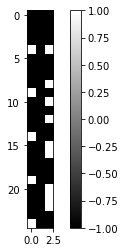

In [3]:
FlattenData = np.zeros((Width*Height, NumberMemory))

for i in range(NumberMemory):
    FlattenData[:,i] = Data[:,:,i].flatten()

plt.imshow(FlattenData, cmap='gray')
plt.colorbar()
plt.show()

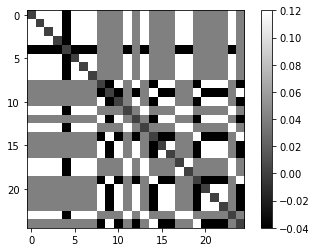

In [4]:
Weight = np.matmul(FlattenData, FlattenData.T) / (Width*Height)

for i in range(Width*Height):
    Weight[i,i] = 0

plt.imshow(Weight, cmap='gray')
plt.colorbar()
plt.show()

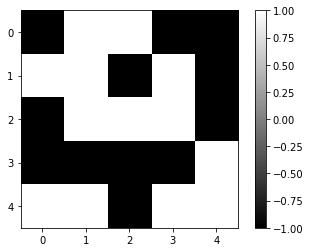

In [14]:
Input = np.random.rand(Width*Height,1) > 0.5
Input = 2 * Input - 1

plt.imshow(Input.reshape(Width,Height), cmap='gray')
plt.colorbar()
plt.show()

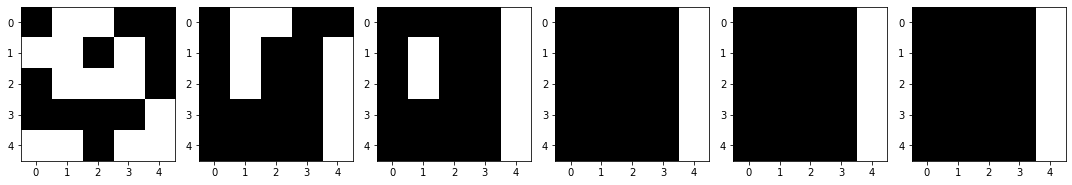

In [15]:
MaxEpoch = 5

fig, axs = plt.subplots(1, MaxEpoch+1, figsize=(15, 5))
axs[0].imshow(Input.reshape(Width,Height), cmap='gray')

for Epoch in range(MaxEpoch):
    for i in range(Width*Height):

        j = np.random.randint(Width*Height)
        Output = np.copy(Input)
        Output[j] = -1 * Output[j]

        EneryBefore = -0.5 * np.matmul(np.matmul(Input.T, Weight), Input)
        EneryAfter  = -0.5 * np.matmul(np.matmul(Output.T, Weight), Output)

        if EneryAfter < EneryBefore:
            Input = np.copy(Output)
        elif np.random.rand() < np.exp(-(EneryAfter - EneryBefore)):
            Input = np.copy(Output)

        Input[j] = np.sign(np.matmul(Weight[j,:], Input))

    axs[Epoch+1].imshow(Input.reshape(Width,Height), cmap='gray')

plt.tight_layout()
plt.show()